# Lead Score - Case Study

## Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. <br>
## Goals and Objectives
There are quite a few goals for this case study.
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

## Importing necessary liabraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [2]:
df_leads=pd.read_csv("Leads.csv")

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Inspect the dataframe

In [5]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
df_leads.shape

(9240, 37)

In [7]:
df_leads.size

341880

In [8]:
df_leads.isnull().mean()

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.155628
How did you hear about X Education               0.238853
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Magazine      

## Cleaning Data

In [9]:
# Replacing 'Select' with NaN (Since it means no option is selected)
df_leads.replace('Select',np.nan, regex=True,inplace=True)

In [10]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [11]:
## Cheking null values mean
df_leads.isnull().mean()

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.365801
How did you hear about X Education               0.784632
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Magazine      

In [12]:
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [13]:
## Filtering the columns which is having null values <40%
df_index=df_leads.columns[100*df_leads.isnull().mean()<40]

In [14]:
df_index

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [15]:
df_leads1=df_leads[df_index]

In [16]:
df_leads1.isnull().mean()

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.365801
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Magazine                                         0.000000
Newspaper Arti

In [17]:
df_leads1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

##### Imputing the null value with median for numeric cols and mode for categorical columns who are having null values<10% for more null values imputing them with level "Not Provided"

In [18]:
df_leads1["TotalVisits"].median()

3.0

In [19]:
df_leads1["TotalVisits"]=df_leads1["TotalVisits"].fillna(df_leads1["TotalVisits"].median())

In [20]:
df_leads1["Lead Source"]=df_leads1["Lead Source"].fillna(df_leads1["Lead Source"].mode()[0])

In [21]:
df_leads1["Page Views Per Visit"]=df_leads1["Page Views Per Visit"].fillna(df_leads1["Page Views Per Visit"].median())

In [22]:
df_leads1["Last Activity"]=df_leads1["Last Activity"].fillna(df_leads1["Last Activity"].mode()[0])

In [23]:
cols_to_subs=["Country","Specialization","What is your current occupation","What matters most to you in choosing a course","Tags","City"]

In [24]:
df_leads1["Country"].replace(np.nan,"Not Provided",regex=True,inplace=True)

In [25]:
df_leads1["Specialization"].replace(np.nan,"Not Provided",regex=True,inplace=True)

In [26]:
df_leads1["What is your current occupation"].replace(np.nan,"Not Provided",regex=True,inplace=True)

In [27]:
df_leads1["What matters most to you in choosing a course"].replace(np.nan,"Not Provided",regex=True,inplace=True)

In [28]:
df_leads1["Tags"].replace(np.nan,"Not Provided",regex=True,inplace=True)

In [29]:
df_leads1["City"].replace(np.nan,"Not Provided",regex=True,inplace=True)

In [30]:
df_leads1

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,Not Provided,Not Provided,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Not Provided,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,Not Provided,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Not Provided,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,Not Provided,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,No,No,Mumbai,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,No,No,Mumbai,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Not Provided,Not Provided,No,No,No,No,No,No,No,No,Not Provided,No,No,Other Metro Cities,No,No,SMS Sent


In [31]:
df_leads1.isnull().mean()

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

## EDA

In [32]:
df_leads1.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Provided,Not Provided,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Not Provided,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Not Provided,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Not Provided,No,No,Email Opened


In [33]:
# Categorising columns
num_cols=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
cat_cols=['Lead Origin','Lead Source','Do Not Email','Do Not Call','Converted','Last Activity','Country','Specialization','What is your current occupation','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Tags','Update me on Supply Chain Content','Get updates on DM Content','City','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Last Notable Activity']

In [34]:
extra_cols=['Prospect ID','Lead Number']

In [35]:
## dropping extra columns which is not to be used for analysis
df_leads1=df_leads1.drop(extra_cols,axis=1)

In [36]:
df_leads1.head(2)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Provided,Not Provided,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Not Provided,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Not Provided,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Not Provided,No,No,Email Opened


## Univariate Analysis

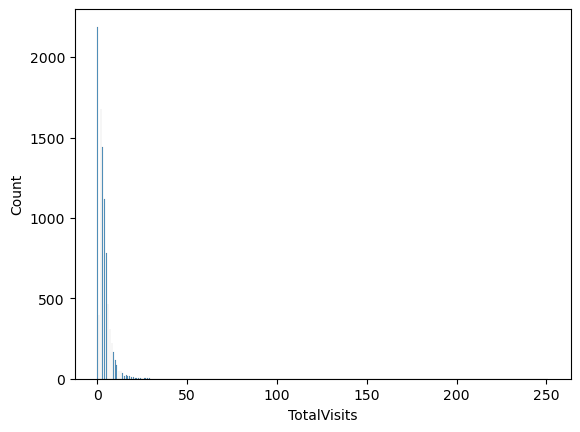

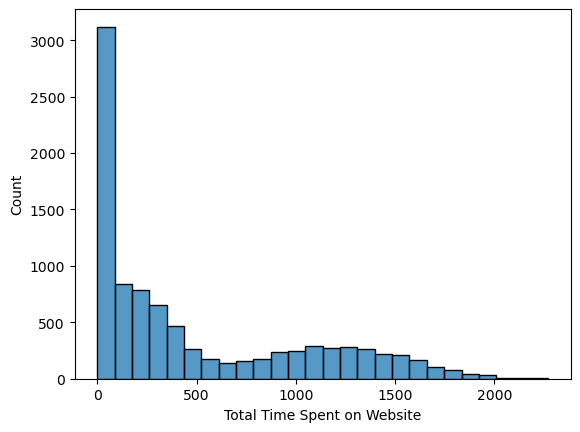

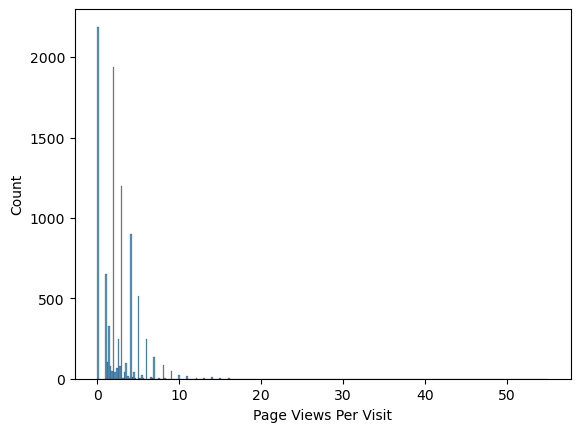

In [37]:
for i in num_cols:
    sns.histplot(x=df_leads1[i])
    plt.show()

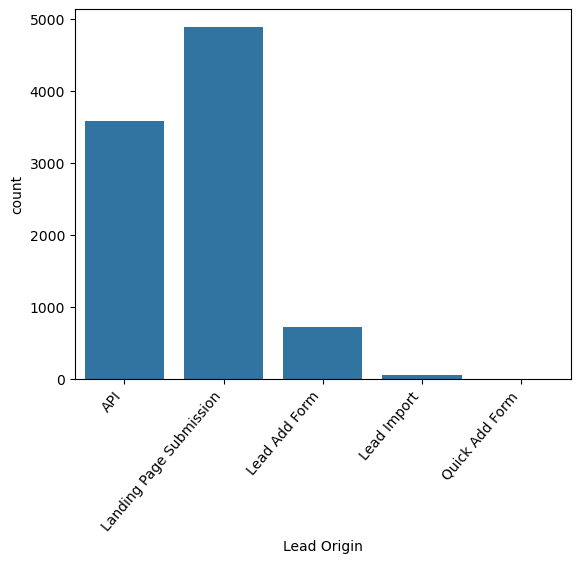

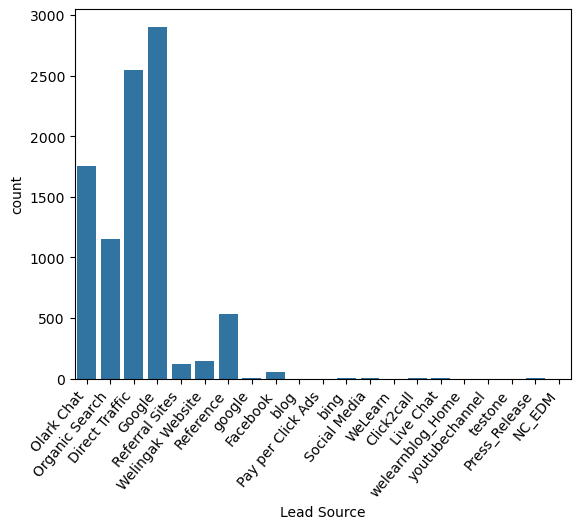

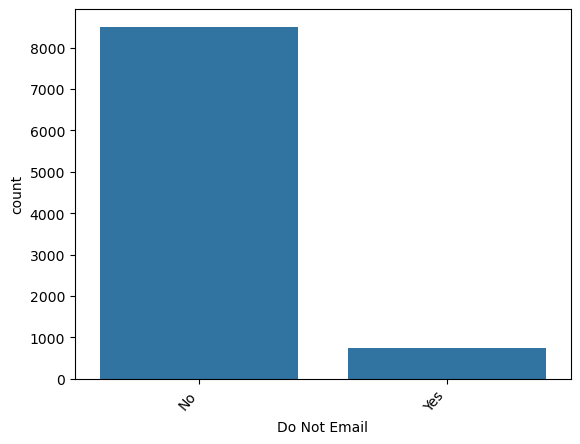

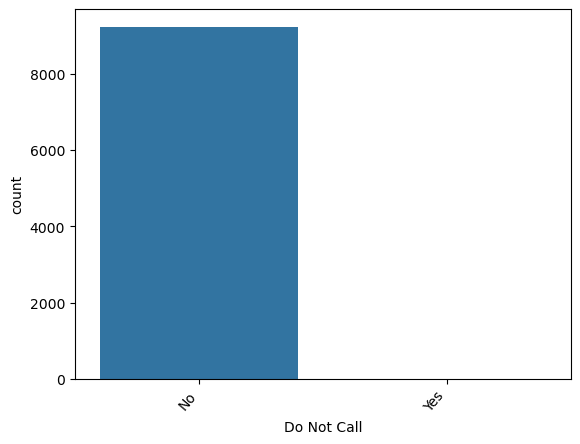

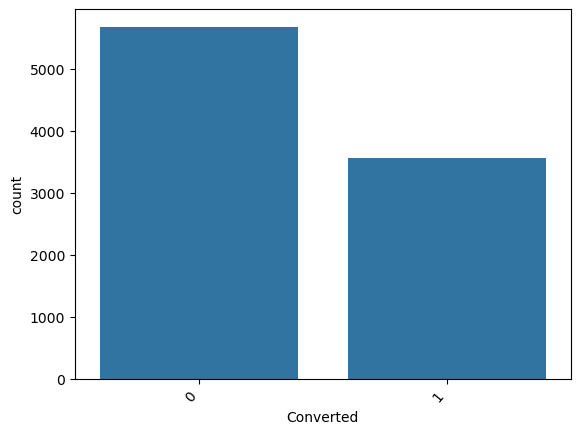

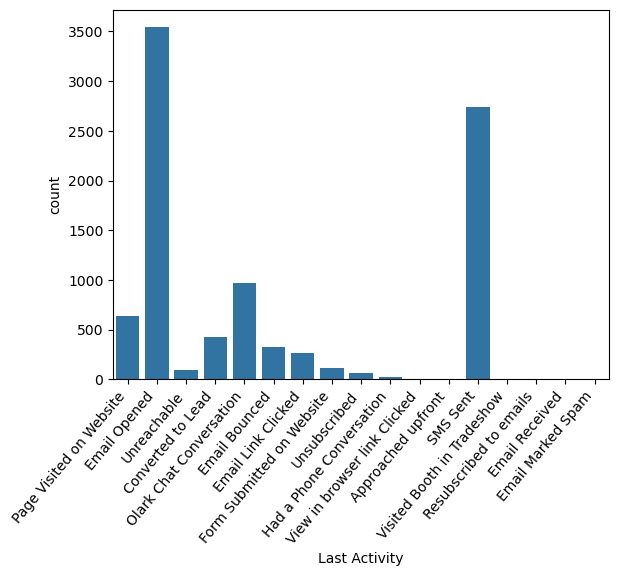

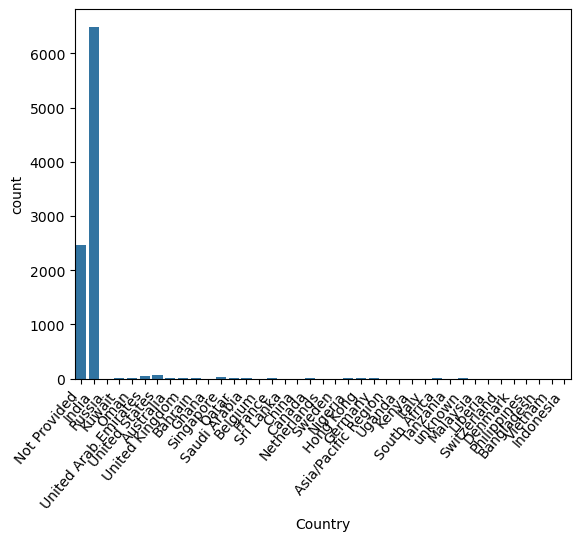

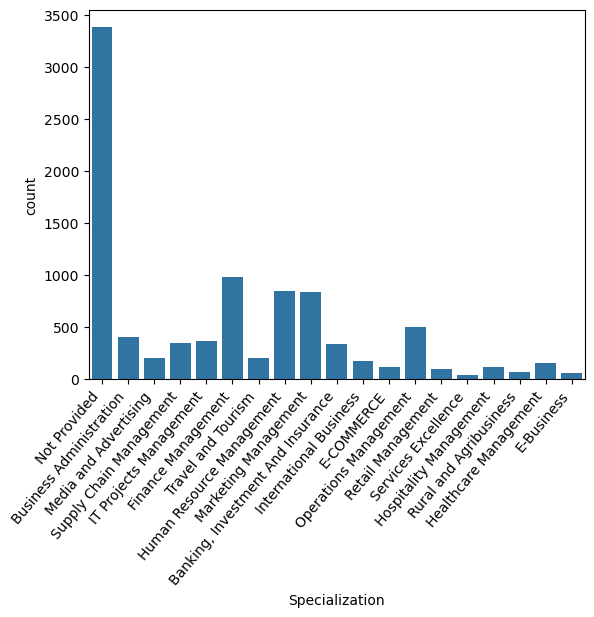

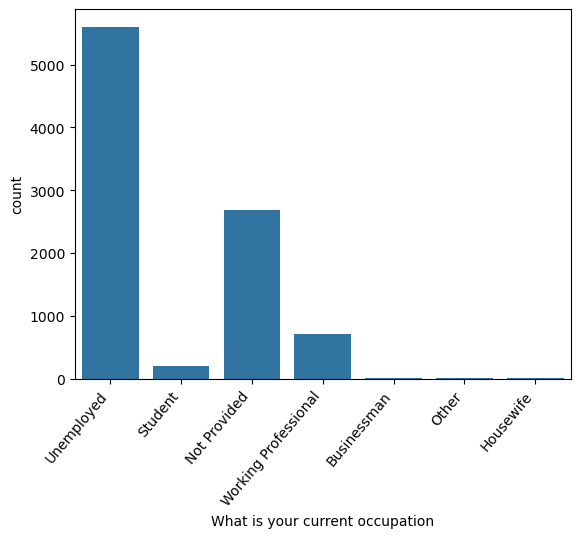

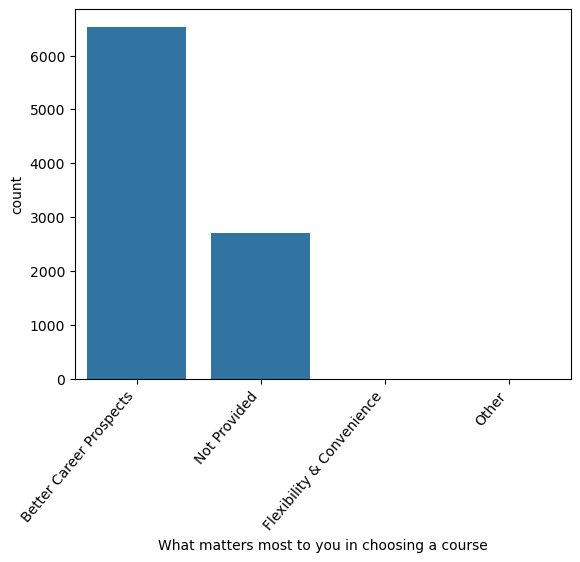

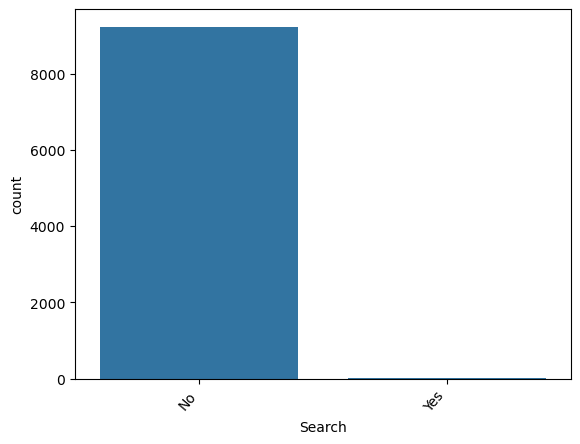

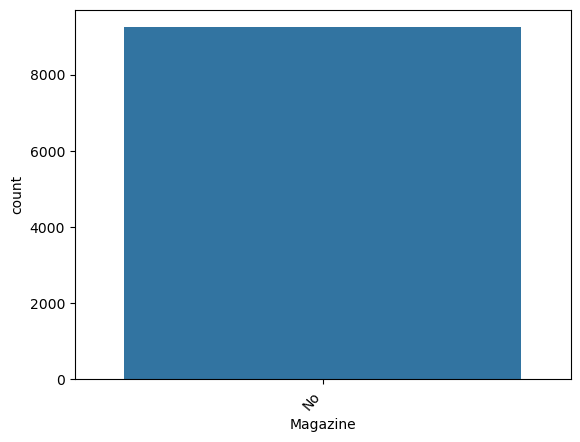

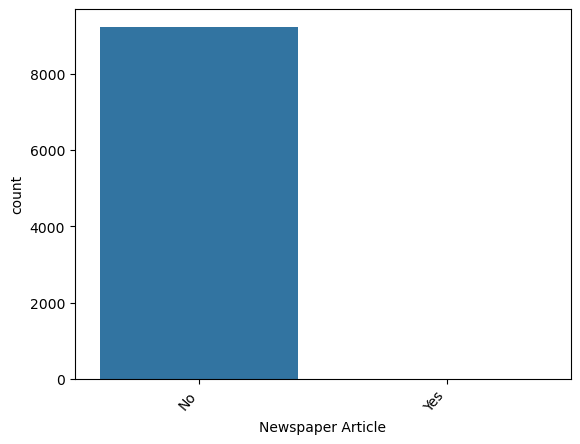

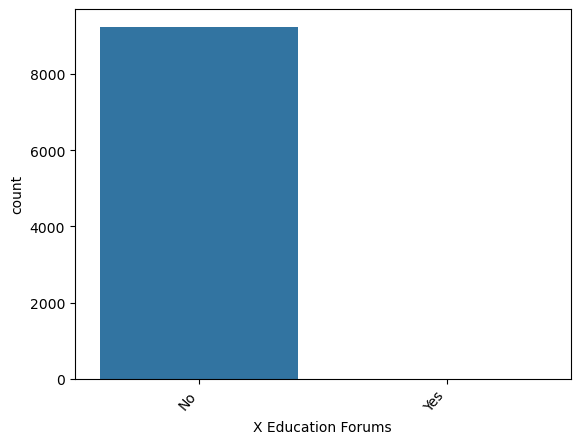

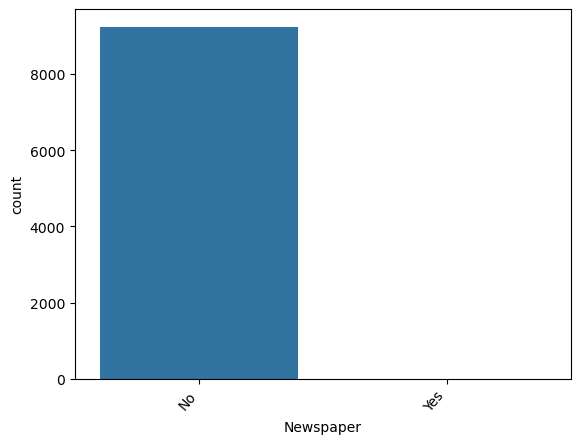

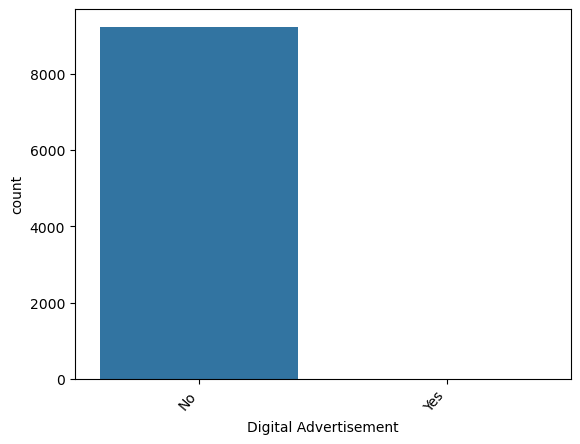

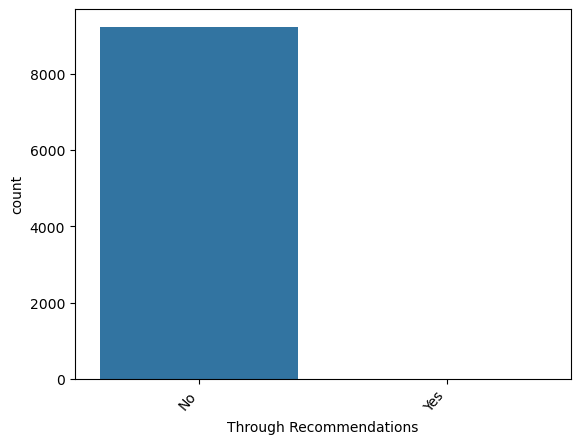

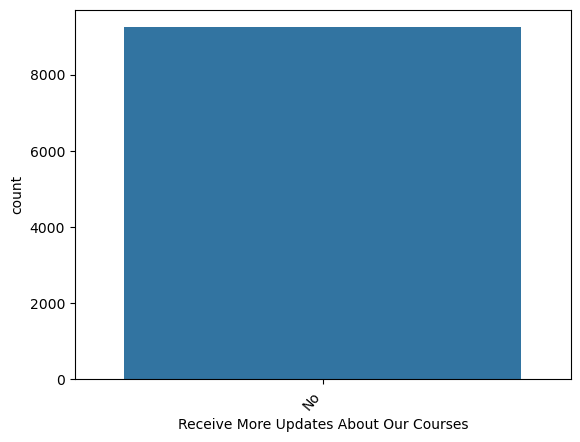

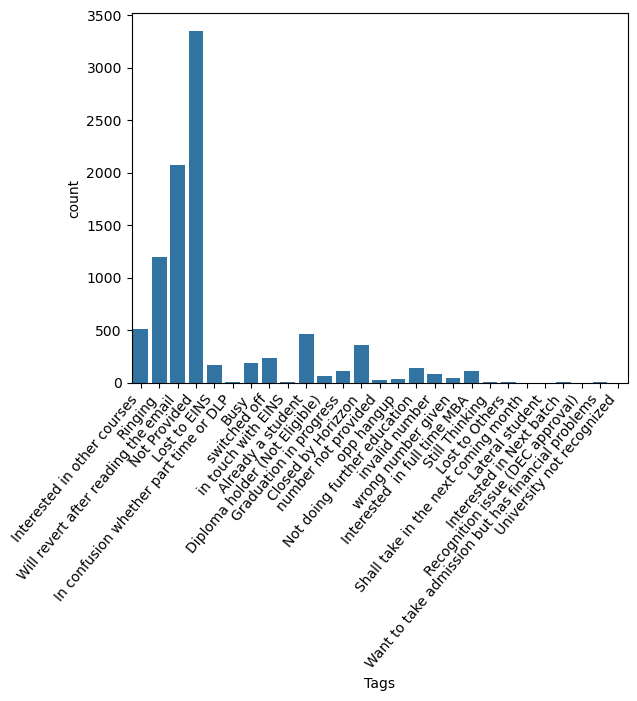

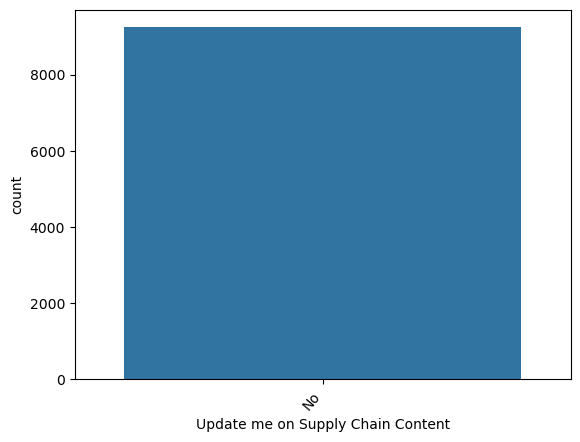

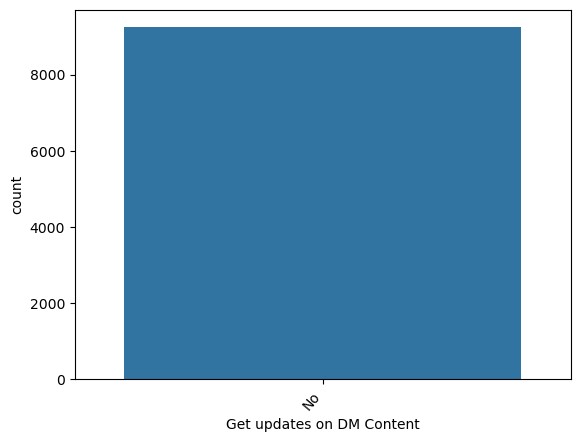

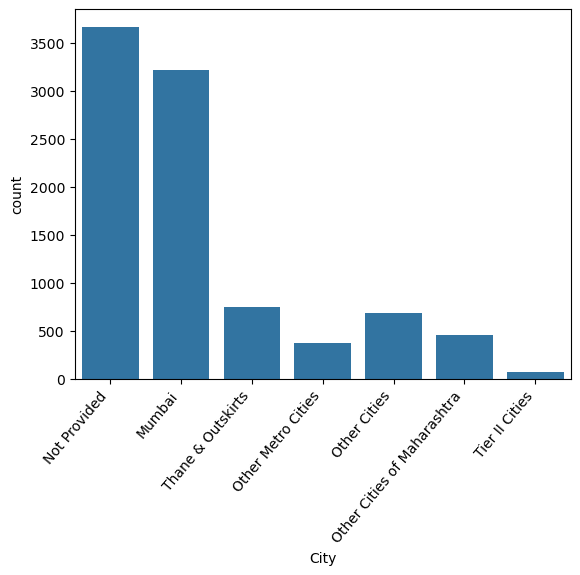

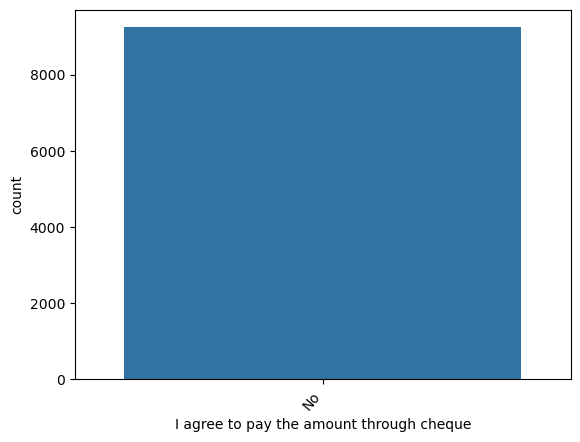

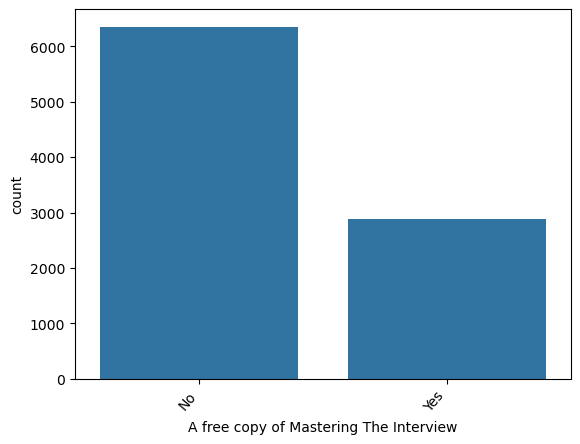

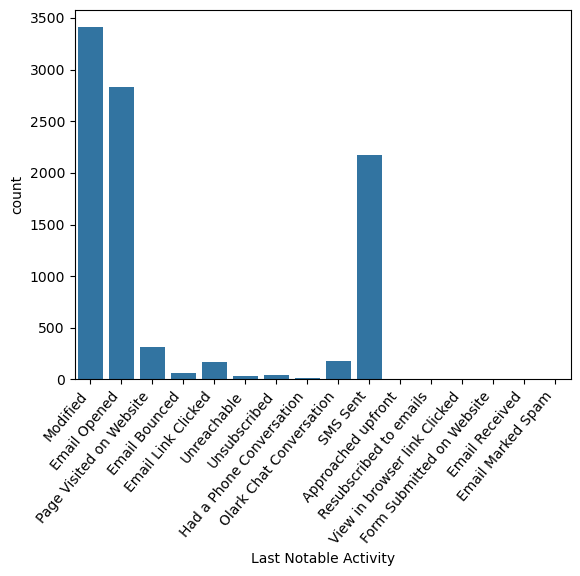

In [38]:
for i in cat_cols:
    ax=sns.countplot(x=df_leads1[i])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
    plt.show()

In [39]:
df_leads1.columns


Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

## Bivariate Analysis

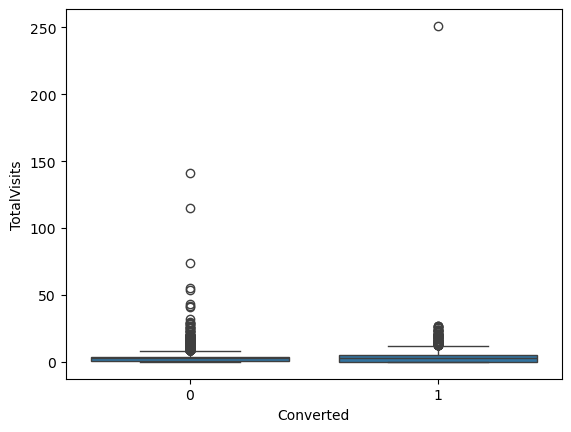

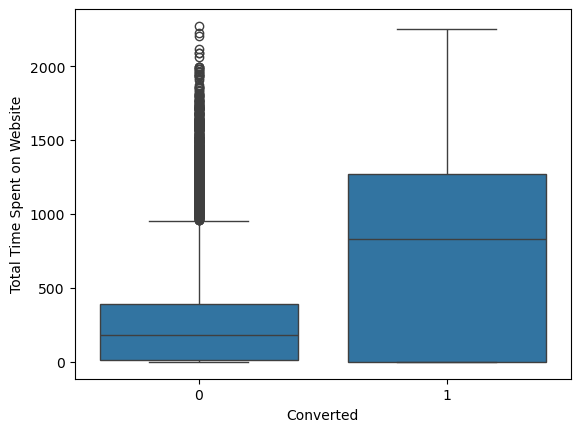

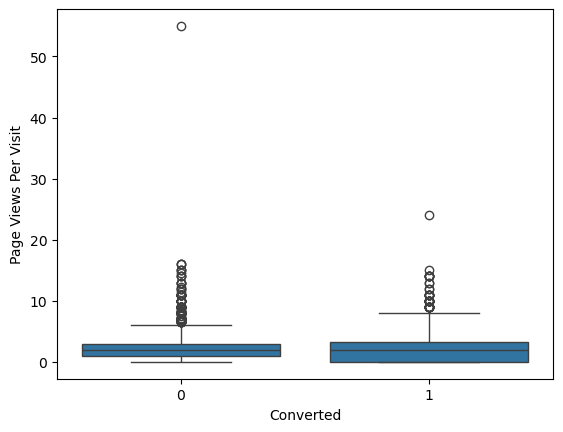

In [40]:
for i in num_cols:
    sns.boxplot(x=df_leads1["Converted"],y=df_leads1[i])
    plt.show()

### 2.1. Relating all the categorical variables to Converted

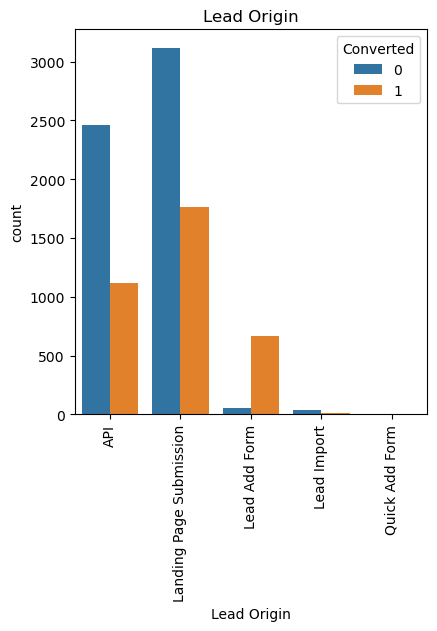

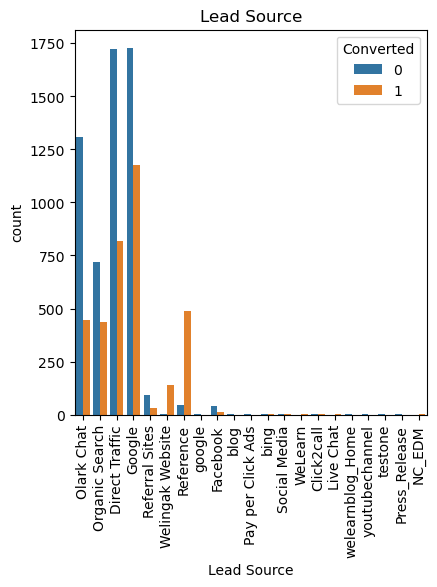

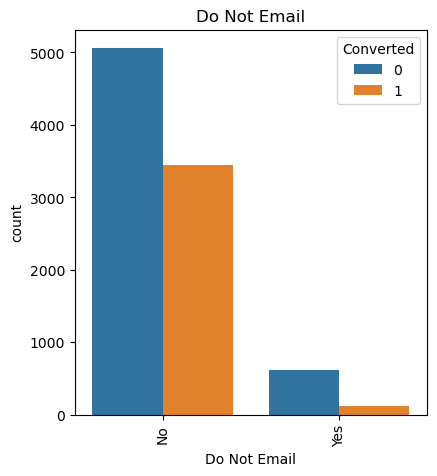

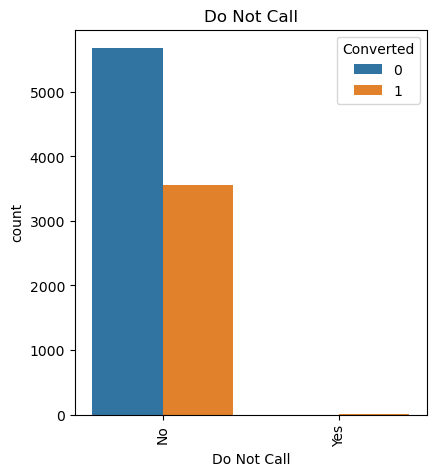

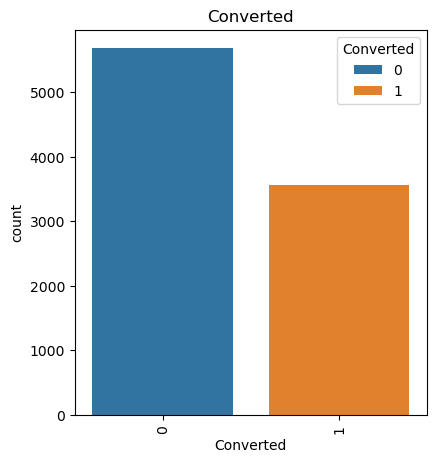

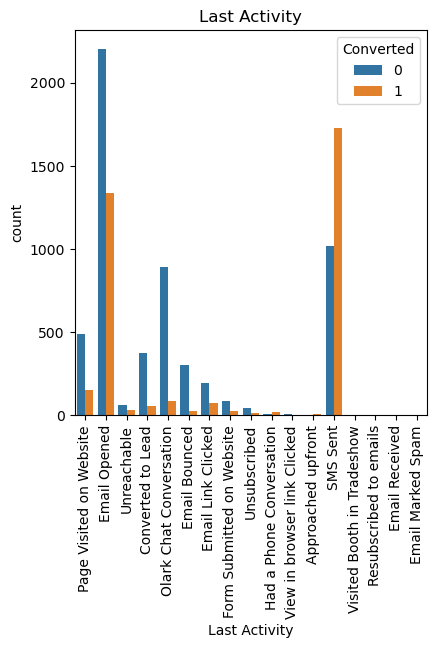

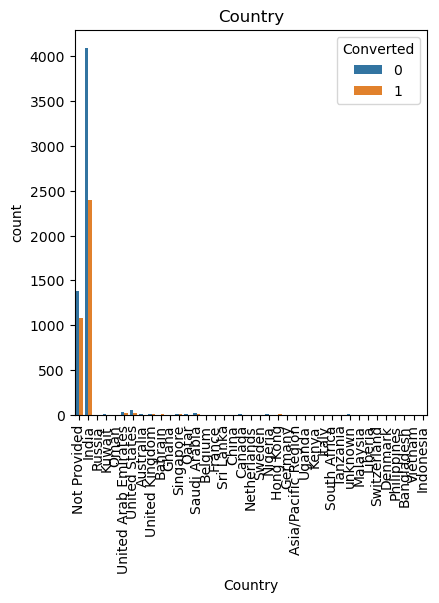

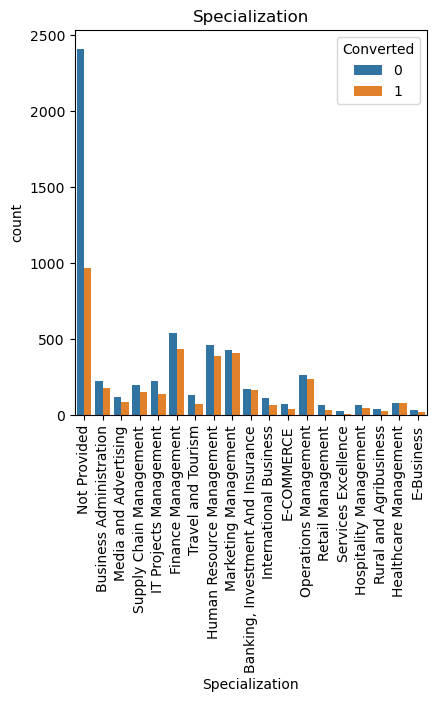

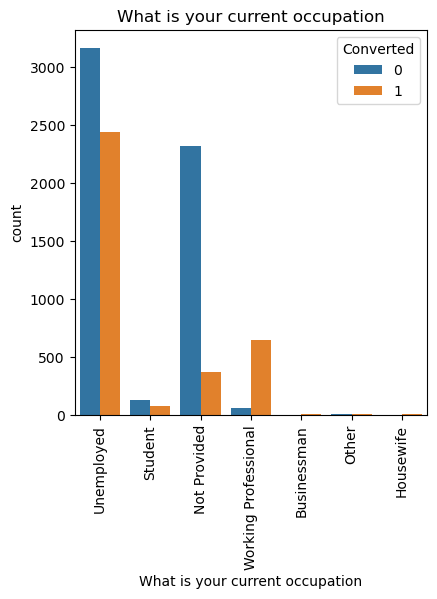

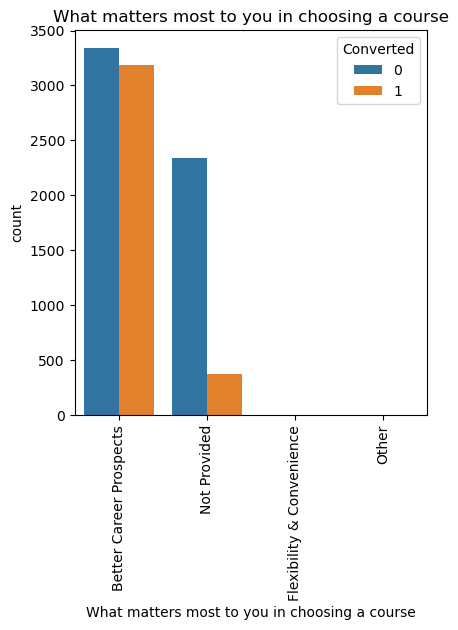

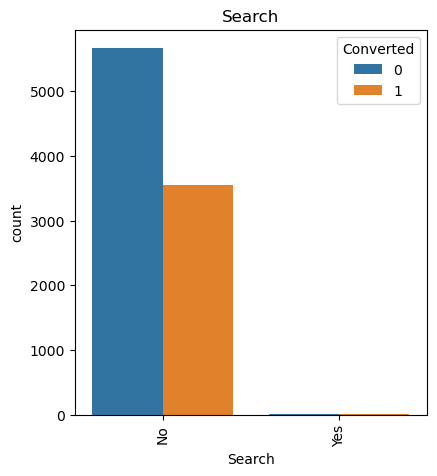

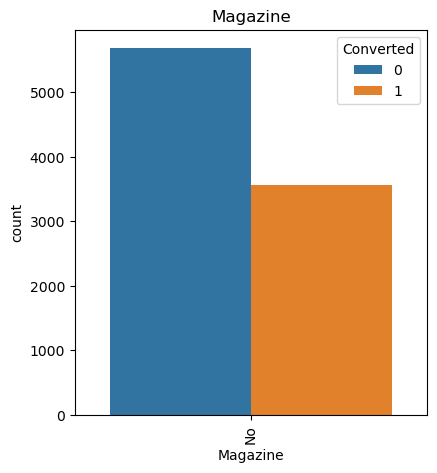

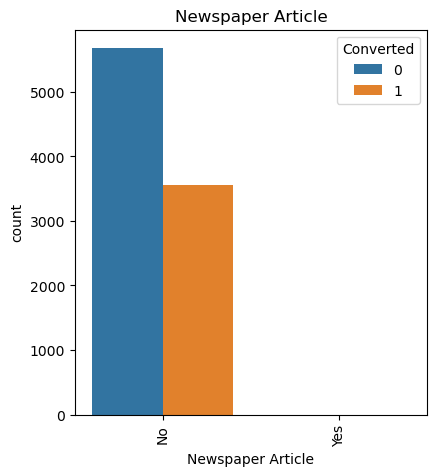

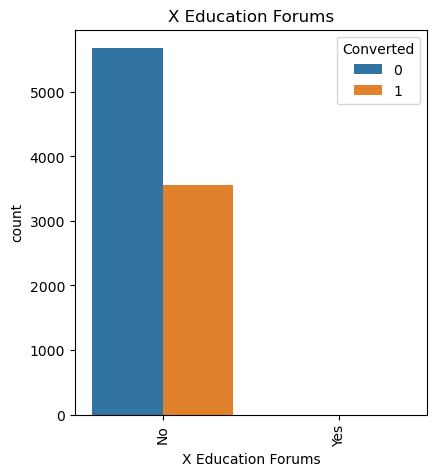

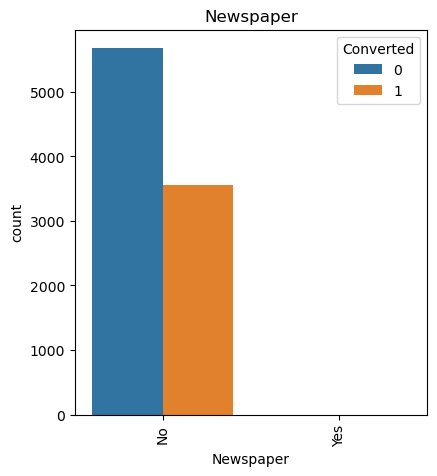

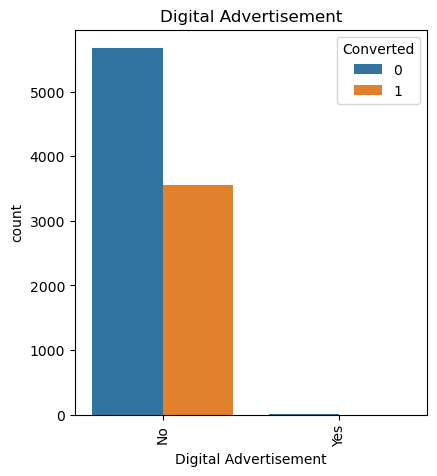

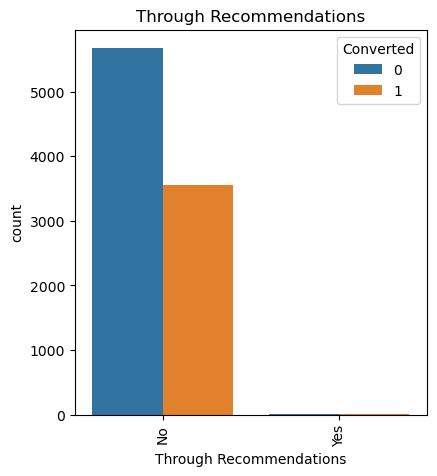

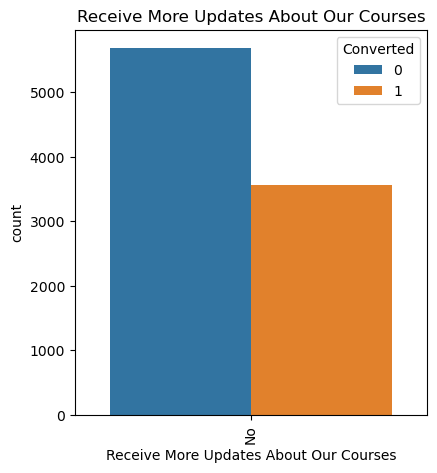

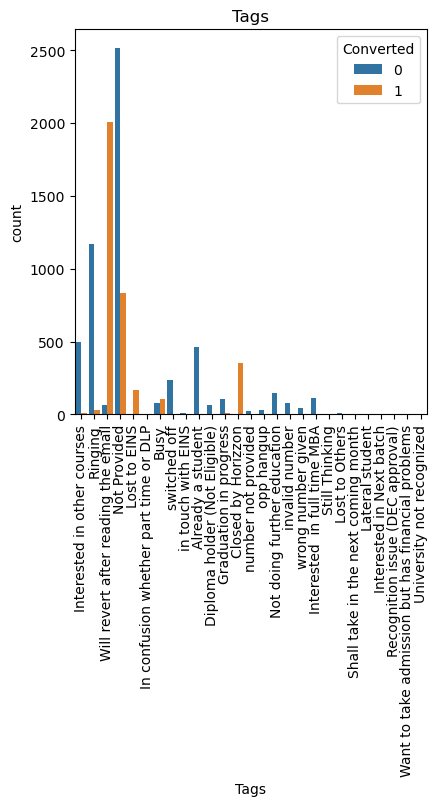

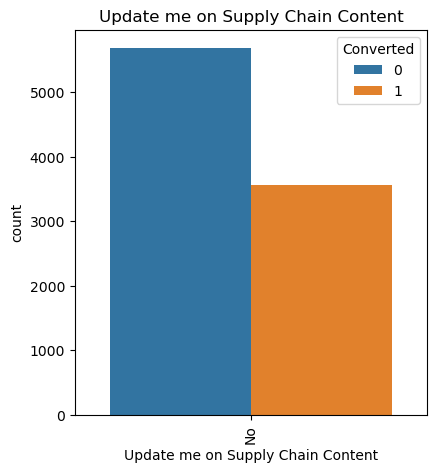

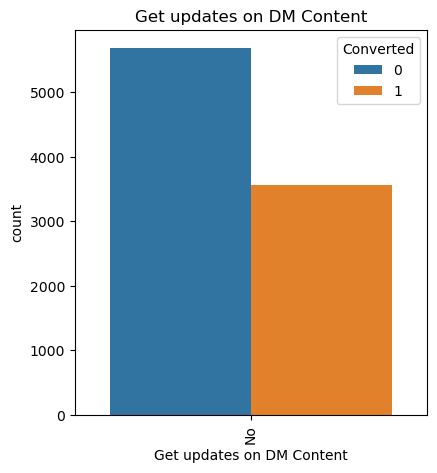

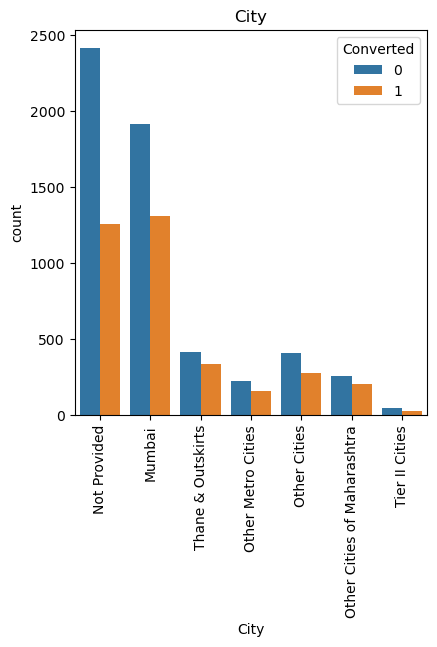

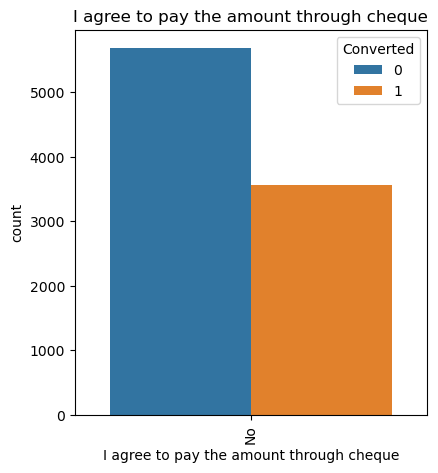

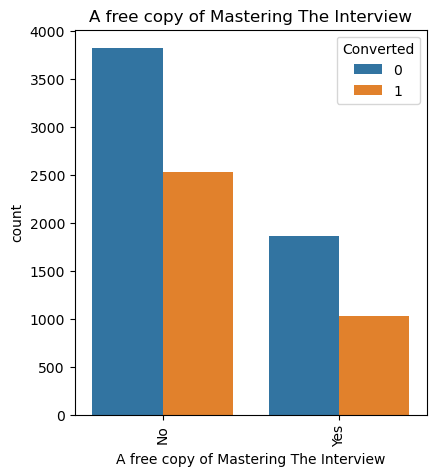

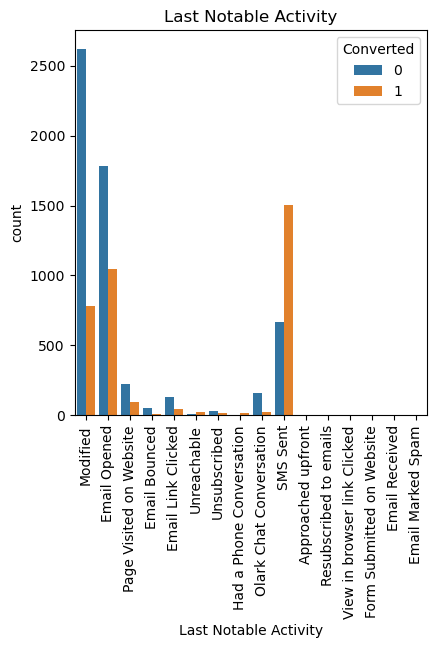

In [41]:
for cols in cat_cols:
    plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    sns.countplot(x=cols, hue='Converted', data= df_leads1).tick_params(axis='x', rotation = 90)
    plt.title(cols)

## Multivariate Analysis

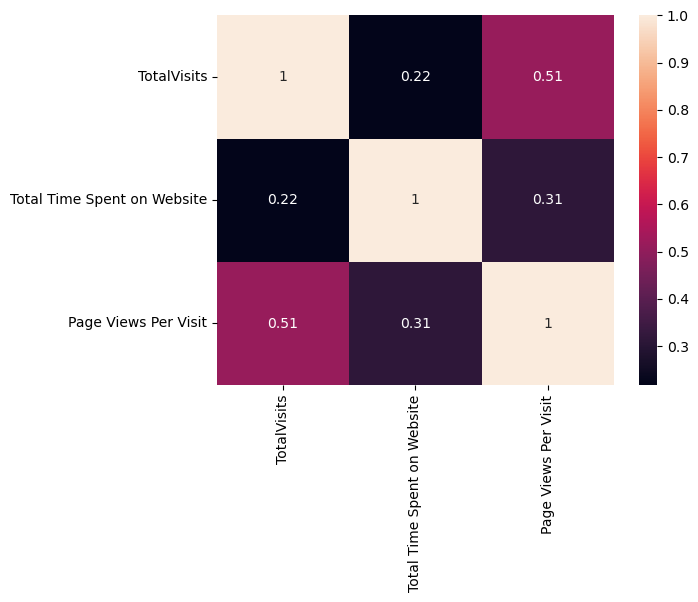

In [42]:
## correlation between numerical variables
sns.heatmap(df_leads1[num_cols].corr(),annot =True)
plt.show()

In [43]:
## checking Outliers
numeric = df_leads1[num_cols]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
99%,17.000000,1840.610000,9.000000
max,251.000000,2272.000000,55.000000


### There aren't any major outliers, so moving on to analysis

### Create Dummy Variables

In [44]:
# Categorising country coulumn where marked other country as 'Outside India' as very few belongs to it and keeping the not provided column as it is. Like this we have 3 categories. 
def slots(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "Not Provided":
        category = "Not Provided"
    else:
        category = "Outside India"
    return category

df_leads1['Country'] = df_leads1.apply(lambda x:slots(x['Country']), axis = 1)
df_leads1['Country'].value_counts()

Country
India            6492
Not Provided     2461
Outside India     287
Name: count, dtype: int64

In [45]:
dum_cols1=['Lead Origin','Lead Source','Last Activity','Last Notable Activity']
dum_cols2=['Country','Specialization','What is your current occupation','What matters most to you in choosing a course','Tags','City',]
non_dum_cols=['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']
to_drop=['Magazine','Receive More Updates About Our Courses','Get updates on DM Content','Update me on Supply Chain Content','I agree to pay the amount through cheque']       

In [46]:
tar_col=['Converted']

In [47]:
len(dum_cols1)

4

In [48]:
len(dum_cols2)

6

In [49]:
len(non_dum_cols)

9

In [50]:
len(to_drop)

5

In [51]:
len(df_leads1.columns)

28

In [52]:
df_leads1.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [53]:
## Dropping the categorical columns which is having one unique value
df_leads1=df_leads1.drop(columns=to_drop,axis=1)

In [54]:
len(df_leads1.columns)

23

In [55]:
## checking no of unique value of the columns is >2 or not
df_leads1.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                             3
Specialization                                     19
What is your current occupation                     7
What matters most to you in choosing a course       4
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations     

In [56]:
for i in dum_cols1:
    print(df_leads1[i].value_counts())
    

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
Lead Source
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
Last Activity
Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced      

In [57]:
for i in dum_cols2:
    print(df_leads1[i].value_counts())

Country
India            6492
Not Provided     2461
Outside India     287
Name: count, dtype: int64
Specialization
Not Provided                         3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64
What is your current occupation
Unemployed              5600


##### Creating dummy columns for categorical variable having category>2

In [58]:
df_leads2=pd.get_dummies(df_leads1,columns=dum_cols1,drop_first=True,dtype=int)

In [59]:
df_leads2.shape

(9240, 74)

In [60]:
dum_cols2=['Country','Specialization','What is your current occupation','What matters most to you in choosing a course','Tags','City',]


In [61]:
# Creating dummy variables for the variable dum_cols2 and dropping the column manually where category is "Not Provided"
Con = pd.get_dummies(df_leads2['Country'], prefix='Country',dtype=int)
Con1 = Con.drop(['Country_Not Provided'], axis=1)
df_leads2 = pd.concat([df_leads2,Con1], axis=1)

In [62]:
Con1

,Country_India,Country_Outside India
0,0,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9235,0,1
9236,1,0
9237,1,0
9238,1,0


In [63]:
Spec = pd.get_dummies(df_leads2['Specialization'], prefix='Specialization',dtype=int)
Spec1 = Spec.drop(['Specialization_Not Provided'], axis=1)
# Adding the results to the master dataframe
df_leads2 = pd.concat([df_leads2,Spec1], axis=1)

In [64]:
Spec1

,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9236,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9237,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9238,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [65]:
Occ = pd.get_dummies(df_leads2['What is your current occupation'], prefix='What is your current occupation',dtype=int)
Occ1 = Occ.drop(['What is your current occupation_Not Provided'], axis=1)
# Adding the results to the master dataframe
df_leads2 = pd.concat([df_leads2,Occ1], axis=1)

In [66]:
Occ1

,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
9235,0,0,0,0,1,0
9236,0,0,0,0,1,0
9237,0,0,0,0,1,0
9238,0,0,0,0,0,0


In [67]:
Wcc = pd.get_dummies(df_leads2['What matters most to you in choosing a course'], prefix='What matters most to you in choosing a course',dtype=int)
Wcc1 = Wcc.drop(['What matters most to you in choosing a course_Not Provided'], axis=1)
# Adding the results to the master dataframe
df_leads2 = pd.concat([df_leads2,Wcc1], axis=1)

In [68]:
Wcc1

,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
9235,1,0,0
9236,1,0,0
9237,1,0,0
9238,0,0,0


In [69]:
Tags = pd.get_dummies(df_leads2['Tags'], prefix='Tags',dtype=int)
Tags1 = Tags.drop(['Tags_Not Provided'], axis=1)
# Adding the results to the master dataframe
df_leads2 = pd.concat([df_leads2,Tags1], axis=1)

In [70]:
Tags1

,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9236,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9237,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9238,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [71]:
City = pd.get_dummies(df_leads2['City'], prefix='City',dtype=int)
City1 = City.drop(['City_Not Provided'], axis=1)
# Adding the results to the master dataframe
df_leads2 = pd.concat([df_leads2,City1], axis=1)

In [72]:
City1

,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
9235,1,0,0,0,0,0
9236,1,0,0,0,0,0
9237,1,0,0,0,0,0
9238,0,0,0,1,0,0


In [73]:
df_leads2=df_leads2.drop(dum_cols2,axis=1)

In [74]:
## Mapping categorical variable with 0 and 1 having 2 category
for i in non_dum_cols:
    df_leads2[i]=df_leads2[i].map({"No":0,"Yes":1})

In [75]:
df_leads2.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Country_India,Country_Outside India,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0

In [76]:
df_leads2['Converted'].value_counts()

Converted
0    5679
1    3561
Name: count, dtype: int64

In [77]:
X=df_leads2.drop('Converted',axis=1)
y=df_leads2['Converted']

##### Performing Train-test split

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [79]:
print("Train X shape:",X_train.shape)
print("Train y shape:",y_train.shape)
print("Test X shape:",X_test.shape)
print("Test y shape:",y_test.shape)

Train X shape: (7392, 128)
Train y shape: (7392,)
Test X shape: (1848, 128)
Test y shape: (1848,)


In [80]:
X_train

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Country_India,Country_Outside India,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
7263,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,

## Scaling

##### Performing scaling using MinMaxScaler on train-test dataset

In [81]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [82]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [83]:
X_train_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00796813, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00796813, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00796813, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [84]:
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [85]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [86]:
X_train_scaled.head(2)

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Country_India,Country_Outside India,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

## Feature Selection

##### Performing feature selection using RFE with total no of feature =20

In [87]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [88]:
estimator=LogisticRegression()
selector=RFE(estimator,n_features_to_select=20)
selector.fit(X_train_scaled,y_train)
selector.support_


array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False,  True,
        True,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False, False, False, False,  True, False,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False]

In [89]:
cols_to_keep=X_train_scaled.columns[selector.support_]

In [90]:
cols_to_keep

Index(['Total Time Spent on Website', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Last Notable Activity_Modified',
       'What matters most to you in choosing a course_Better Career Prospects',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)', 'Tags_Graduation in progress',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_opp hangup', 'Tags_switched off',
       'Tags_wrong number given'],
      dtype='object')

In [91]:
X_train=X_train_scaled[cols_to_keep]

In [92]:
X_test=X_test_scaled[cols_to_keep]

In [93]:
print("Train X shape:",X_train.shape)
print("Test X shape:",X_test.shape)
print("Train y shape:",y_train.shape)
print("Test y shape:",y_test.shape)

Train X shape: (7392, 20)
Test X shape: (1848, 20)
Train y shape: (7392,)
Test y shape: (1848,)


## First Model

##### Model building on the basis of P-value and VIF ; P-value<.05 and VIF< 5

In [94]:
import statsmodels.api as sm

In [95]:
X_train_sm=sm.add_constant(X_train,has_constant="add")
X_test_sm=sm.add_constant(X_test,has_constant="add")

In [96]:
model1=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())
result1=model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7371
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1312.7
Date:                Tue, 18 Feb 2025   Deviance:                       2625.3
Time:                        17:32:40   Pearson chi2:                 1.30e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6230
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -2.8313      0.112    -25.174      0.000      -3.052      -2.611
Total Time Spent on Website                                               3.4667      0.216     16.044      0.000       3.043       3.890
Lead Source_Welingak Website                                              3.7235      0.736      5.060      0.000       2.281       5.166
Last Activity_SMS Sent                                                    1.9776      0.115     17.267      0.000       1.753       2.202
Last Notable Activity_Modified                                           -1.5346      0.121    -12.698      0.000      -1.771      -1.298
What matters most to you in choosing a course_Better Career Prospects     2.2089      0.127     17.400      0.000       1.960       2.458
Tags_Already a student                                                   -4.9970      0.722     -6.920      0.000      -6.412      -3.582
Tags_Closed by Horizzon                                                   6.5565      1.013      6.473      0.000       4.571       8.542
Tags_Diploma holder (Not Eligible)                                      -25.4106   2.64e+04     -0.001      0.999   -5.17e+04    5.17e+04
Tags_Graduation in progress                                              -2.0449      0.460     -4.444      0.000      -2.947      -1.143
Tags_Interested  in full time MBA                                        -3.2544      0.620     -5.251      0.000      -4.469      -2.040
Tags_Interested in other courses                                         -3.2187      0.350     -9.185      0.000      -3.906      -2.532
Tags_Lost to EINS                                                         5.6211      0.621      9.047      0.000       4.403       6.839
Tags_Not doing further education                                         -4.5354      1.019     -4.452      0.000      -6.532      -2.539
Tags_Ringing                                                             -4.9301      0.239    -20.655      0.000      -5.398      -4.462
Tags_Will revert after reading the email                                  3.0232      0.177     17.054      0.000       2.676       3.371
Tags_invalid number                                                      -5.5961      1.075     -5.205      0.000      -7.703      -3.489
Tags_number not provided                                                -26.5462   4.08e+04     -0.001      0.999      -8e+04       8e+04
Tags_opp hangup                                                          -3.2050      0.776     -4.130      0.000      -4.726      -1.684
Tags_switched off                              

##### One by One manually dropping the variable having p-value>.05

In [97]:
X_train_sm=X_train_sm.drop(["Tags_wrong number given"],axis=1)
X_test_sm=X_test_sm.drop(["Tags_wrong number given"],axis=1)

In [98]:
model2=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7372
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1352.5
Date:                Tue, 18 Feb 2025   Deviance:                       2705.0
Time:                        17:32:41   Pearson chi2:                 1.20e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6189
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -2.7918      0.111    -25.254      0.000      -3.008      -2.575
Total Time Spent on Website                                               3.4233      0.212     16.149      0.000       3.008       3.839
Lead Source_Welingak Website                                              3.8891      0.735      5.294      0.000       2.449       5.329
Last Activity_SMS Sent                                                    1.8962      0.111     17.048      0.000       1.678       2.114
Last Notable Activity_Modified                                           -1.5085      0.119    -12.633      0.000      -1.743      -1.274
What matters most to you in choosing a course_Better Career Prospects     2.0146      0.123     16.426      0.000       1.774       2.255
Tags_Already a student                                                   -4.8266      0.721     -6.691      0.000      -6.241      -3.413
Tags_Closed by Horizzon                                                   6.6961      1.012      6.614      0.000       4.712       8.681
Tags_Diploma holder (Not Eligible)                                      -24.2370    1.6e+04     -0.002      0.999   -3.14e+04    3.14e+04
Tags_Graduation in progress                                              -1.8682      0.457     -4.092      0.000      -2.763      -0.973
Tags_Interested  in full time MBA                                        -3.0784      0.618     -4.982      0.000      -4.289      -1.867
Tags_Interested in other courses                                         -3.0395      0.347     -8.749      0.000      -3.720      -2.359
Tags_Lost to EINS                                                         5.6221      0.618      9.099      0.000       4.411       6.833
Tags_Not doing further education                                         -4.3583      1.018     -4.281      0.000      -6.353      -2.363
Tags_Ringing                                                             -4.6952      0.234    -20.046      0.000      -5.154      -4.236
Tags_Will revert after reading the email                                  3.1855      0.175     18.188      0.000       2.842       3.529
Tags_invalid number                                                      -5.3548      1.071     -5.001      0.000      -7.453      -3.256
Tags_number not provided                                                -25.3189   2.49e+04     -0.001      0.999   -4.88e+04    4.87e+04
Tags_opp hangup                                                          -2.9919      0.773     -3.869      0.000      -4.508      -1.476
Tags_switched off                              

In [99]:
X_train_sm=X_train_sm.drop(["Tags_number not provided"],axis=1)
X_test_sm=X_test_sm.drop(["Tags_number not provided"],axis=1)

In [100]:
model3=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())
result3=model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7373
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1371.9
Date:                Tue, 18 Feb 2025   Deviance:                       2743.8
Time:                        17:32:41   Pearson chi2:                 1.17e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6169
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -2.7784      0.110    -25.294      0.000      -2.994      -2.563
Total Time Spent on Website                                               3.4056      0.210     16.218      0.000       2.994       3.817
Lead Source_Welingak Website                                              3.9728      0.734      5.411      0.000       2.534       5.412
Last Activity_SMS Sent                                                    1.8692      0.110     17.015      0.000       1.654       2.084
Last Notable Activity_Modified                                           -1.4983      0.119    -12.622      0.000      -1.731      -1.266
What matters most to you in choosing a course_Better Career Prospects     1.9207      0.121     15.914      0.000       1.684       2.157
Tags_Already a student                                                   -4.7401      0.721     -6.574      0.000      -6.153      -3.327
Tags_Closed by Horizzon                                                   6.7706      1.012      6.688      0.000       4.786       8.755
Tags_Diploma holder (Not Eligible)                                      -24.1494    1.6e+04     -0.002      0.999   -3.15e+04    3.14e+04
Tags_Graduation in progress                                              -1.7804      0.455     -3.911      0.000      -2.673      -0.888
Tags_Interested  in full time MBA                                        -2.9904      0.617     -4.846      0.000      -4.200      -1.781
Tags_Interested in other courses                                         -2.9509      0.346     -8.524      0.000      -3.629      -2.272
Tags_Lost to EINS                                                         5.6314      0.616      9.137      0.000       4.423       6.839
Tags_Not doing further education                                         -4.2700      1.018     -4.196      0.000      -6.264      -2.275
Tags_Ringing                                                             -4.5872      0.232    -19.741      0.000      -5.043      -4.132
Tags_Will revert after reading the email                                  3.2685      0.174     18.773      0.000       2.927       3.610
Tags_invalid number                                                      -5.2444      1.069     -4.905      0.000      -7.340      -3.149
Tags_opp hangup                                                          -2.8918      0.772     -3.744      0.000      -4.405      -1.378
Tags_switched off                                                        -4.8740      0.526     -9.272      0.000      -5.904      -3.844
===============================================

In [101]:
X_train_sm=X_train_sm.drop(["Tags_Diploma holder (Not Eligible)"],axis=1)
X_test_sm=X_test_sm.drop(["Tags_Diploma holder (Not Eligible)"],axis=1)

In [102]:
model4=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())
result4=model4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7374
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1395.3
Date:                Tue, 18 Feb 2025   Deviance:                       2790.7
Time:                        17:32:41   Pearson chi2:                 1.20e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6145
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -2.7796      0.109    -25.397      0.000      -2.994      -2.565
Total Time Spent on Website                                               3.3557      0.207     16.195      0.000       2.950       3.762
Lead Source_Welingak Website                                              4.1091      0.735      5.594      0.000       2.669       5.549
Last Activity_SMS Sent                                                    1.9183      0.109     17.600      0.000       1.705       2.132
Last Notable Activity_Modified                                           -1.5257      0.118    -12.959      0.000      -1.756      -1.295
What matters most to you in choosing a course_Better Career Prospects     1.7873      0.118     15.119      0.000       1.556       2.019
Tags_Already a student                                                   -4.5857      0.720     -6.366      0.000      -5.998      -3.174
Tags_Closed by Horizzon                                                   6.9330      1.012      6.851      0.000       4.950       8.916
Tags_Graduation in progress                                              -1.6348      0.455     -3.590      0.000      -2.527      -0.742
Tags_Interested  in full time MBA                                        -2.8361      0.616     -4.603      0.000      -4.044      -1.628
Tags_Interested in other courses                                         -2.8024      0.346     -8.110      0.000      -3.480      -2.125
Tags_Lost to EINS                                                         5.7022      0.615      9.277      0.000       4.497       6.907
Tags_Not doing further education                                         -4.1190      1.017     -4.049      0.000      -6.113      -2.125
Tags_Ringing                                                             -4.4721      0.231    -19.364      0.000      -4.925      -4.019
Tags_Will revert after reading the email                                  3.4166      0.173     19.782      0.000       3.078       3.755
Tags_invalid number                                                      -5.1307      1.067     -4.807      0.000      -7.223      -3.039
Tags_opp hangup                                                          -2.7768      0.773     -3.591      0.000      -4.292      -1.261
Tags_switched off                                                        -4.7648      0.525     -9.073      0.000      -5.794      -3.736
=========================================================================================================================================
"""

#### Now all the remaining features are having P-value<.05. Now check for VIF

In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i)
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,5.450714
1,Total Time Spent on Website,1.121676
2,Lead Source_Welingak Website,1.080600
3,Last Activity_SMS Sent,1.159830
4,Last Notable Activity_Modified,1.198799
5,What matters most to you in choosing a course_...,2.500071
6,Tags_Already a student,1.390380
7,Tags_Closed by Horizzon,1.312715
8,Tags_Graduation in progress,1.092674
9,Tags_Interested in full time MBA,1.111058


##### All the features having VIF<5

## Creating Prediction

In [104]:
# Predicting the probabilities on the train set
y_train_pred = result4.predict(X_train_sm)
y_train_pred[:10]

0    0.988050
1    0.017971
2    0.739373
3    0.229013
4    0.074609
5    0.999133
6    0.015478
7    0.999957
8    0.343365
9    0.013317
dtype: float64

In [105]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.98805041, 0.0179711 , 0.73937313, 0.22901348, 0.07460918,
       0.99913326, 0.01547808, 0.99995681, 0.34336517, 0.01331723])

In [106]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.988050
1,0,0.017971
2,1,0.739373
3,0,0.229013
4,0,0.074609


In [107]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.988050,1
1,0,0.017971,0
2,1,0.739373,1
3,0,0.229013,0
4,0,0.074609,0


## Model Evaluation

In [108]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [109]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[4385,  178],
       [ 326, 2503]], dtype=int64)

In [110]:
# Predicted     not_churn    churn
# Actual
# not_churn        4385       178
# churn             312      2517

In [111]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9318181818181818

In [112]:
##That's around 93% accuracy with is a very good value

In [113]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [114]:
# Calculating the sensitivity
TP/(TP+FN)

0.8847649346058678

In [115]:
# Calculating the specificity
TN/(TN+FP)

0.9609905763751918

In [116]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9336068631107796

In [117]:
# Sensitivity is 88% and Precision is 93%, there is little difference in that,we need to optimise

##### Since we have chosen random value for cut-off i.e. 0.5.Hence,let's optimise the value using ROC curve cut-off

# Optimise Cut off (ROC Curve)

In [118]:
##The previous cut off was randomely selected. Now to find the optimum one

In [119]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [120]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

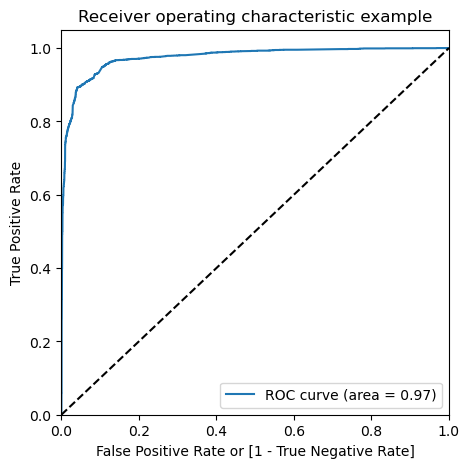

In [121]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

#### The area under ROC curve is 0.97 which is a very good value.

In [122]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.988050,1,1,1,1,1,1,1,1,1,1,1
1,0,0.017971,0,1,0,0,0,0,0,0,0,0,0
2,1,0.739373,1,1,1,1,1,1,1,1,1,0,0
3,0,0.229013,0,1,1,1,0,0,0,0,0,0,0
4,0,0.074609,0,1,0,0,0,0,0,0,0,0,0


In [123]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.382711,1.000000,0.000000
0.1,0.1,0.876353,0.970308,0.818102
0.2,0.2,0.911797,0.955815,0.884506
0.3,0.3,0.918290,0.917992,0.918475
0.4,0.4,0.928977,0.896430,0.949156
0.5,0.5,0.931818,0.884765,0.960991
0.6,0.6,0.927895,0.870626,0.963401
0.7,0.7,0.923431,0.850477,0.968661
0.8,0.8,0.905574,0.781548,0.982468
0.9,0.9,0.896510,0.747614,0.988823


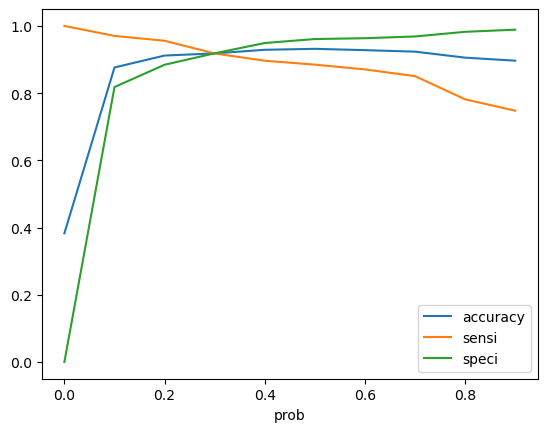

In [124]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### From the graph it is visible that the optimal cut off is at 0.30

In [125]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.30 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.988050,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.017971,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.739373,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.229013,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.074609,0,1,0,0,0,0,0,0,0,0,0,0


In [126]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9182900432900433

In [127]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[4191,  372],
       [ 232, 2597]], dtype=int64)

In [128]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [129]:
# Calculating the sensitivity
TP/(TP+FN)

0.9179922234004949

In [130]:
# Calculating the specificity
TN/(TN+FP)

0.9184746877054569

In [131]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9336068631107796

In [132]:
## With the current cut off as 0.30 we have accuracy,sensitivity,and specificity of around 91% and precision is 93%.

## Prediction on Test set taking cut-off =.30

In [133]:
X_test.head()

,Total Time Spent on Website,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,What matters most to you in choosing a course_Better Career Prospects,Tags_Already a student,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
0,0.444982,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.025968,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [134]:
X_test_sm

,const,Total Time Spent on Website,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,What matters most to you in choosing a course_Better Career Prospects,Tags_Already a student,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_opp hangup,Tags_switched off
0,1.0,0.444982,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.025968,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.000000,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,1.0,0.151849,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1844,1.0,0.101673,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1845,1.0,0.400968,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1846,1.0,0.018046,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
y_test_pred = result4.predict(X_test_sm)

In [136]:
y_test_pred[:10]

0    0.652927
1    0.987164
2    0.924937
3    0.000821
4    0.918659
5    0.994762
6    0.980553
7    0.943752
8    0.021941
9    0.989838
dtype: float64

In [137]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_test_pred)

In [138]:

y_pred_df.head()

,0
0,0.652927
1,0.987164
2,0.924937
3,0.000821
4,0.918659


In [139]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [140]:
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.652927
1,1,0.987164
2,1,0.924937
3,0,0.000821
4,1,0.918659


In [141]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.30 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,1,0.652927,1
1,1,0.987164,1
2,1,0.924937,1
3,0,0.000821,0
4,1,0.918659,1
...,...,...,...
1843,0,0.381608,1
1844,0,0.038983,0
1845,1,0.014310,0
1846,0,0.000869,0


In [142]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.9134199134199135

In [143]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1012,  104],
       [  56,  676]], dtype=int64)

In [144]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [145]:
# Calculating the sensitivity
TP/(TP+FN)

0.9234972677595629

In [146]:
# Calculating the specificity
TN/(TN+FP)

0.9068100358422939

In [147]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9336068631107796

#### With the current cut off as 0.30 we have accuracy=91%  Sensitivity around 92 %  Precision 93% and Specificity around 90%

##### There is still some difference between precision and recall on train and test data,let's try to optimise by finding cut-off by plotting the curve between probability and actual.

## Precision-Recall

In [148]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[4385,  178],
       [ 326, 2503]], dtype=int64)

In [149]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9336068631107796

In [150]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8847649346058678

###### With the current cut off as 0.50 we have Precision around 93% and Recall around 88%

###  Precision and recall tradeoff

In [151]:
from sklearn.metrics import precision_recall_curve

In [152]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       1
 3       0
 4       0
        ..
 7387    1
 7388    1
 7389    1
 7390    0
 7391    0
 Name: Converted, Length: 7392, dtype: int64,
 0       1
 1       0
 2       1
 3       0
 4       0
        ..
 7387    1
 7388    1
 7389    0
 7390    0
 7391    0
 Name: Predicted, Length: 7392, dtype: int64)

In [153]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

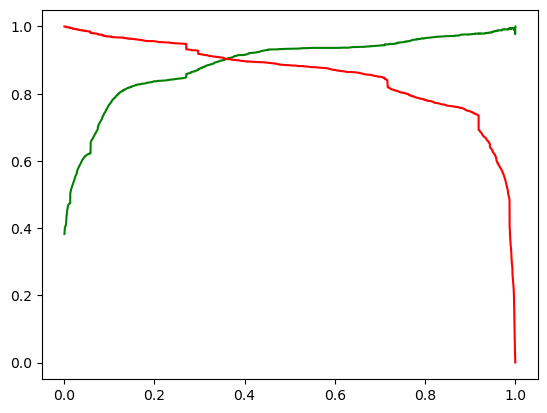

In [154]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

##### Here we can see the cut-off point is .39 . Hence again calculate accuracy, precision and recall with current cut--off

In [155]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.39 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.988050,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.017971,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.739373,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.229013,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.074609,0,1,0,0,0,0,0,0,0,0,0,0


In [156]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9291125541125541

In [157]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[4327,  236],
       [ 288, 2541]], dtype=int64)

In [158]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [159]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.9150162045372704

In [160]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.8981972428419936

### With the current cut off as 0.39 we have Accuracy around 93% Precision around 91.5% and Recall around 90%

## Prediction on Test set¶ current cut-off=0.39

##### Making predictions on the test set

In [161]:
X_test.head()

,Total Time Spent on Website,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,What matters most to you in choosing a course_Better Career Prospects,Tags_Already a student,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
0,0.444982,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.025968,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [162]:
X_test_sm

,const,Total Time Spent on Website,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,What matters most to you in choosing a course_Better Career Prospects,Tags_Already a student,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_opp hangup,Tags_switched off
0,1.0,0.444982,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.025968,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.000000,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,1.0,0.151849,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1844,1.0,0.101673,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1845,1.0,0.400968,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1846,1.0,0.018046,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [163]:
y_test_pred = result4.predict(X_test_sm)

In [164]:
y_test_pred[:10]

0    0.652927
1    0.987164
2    0.924937
3    0.000821
4    0.918659
5    0.994762
6    0.980553
7    0.943752
8    0.021941
9    0.989838
dtype: float64

In [165]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_test_pred)

In [166]:
y_pred_df.head()

,0
0,0.652927
1,0.987164
2,0.924937
3,0.000821
4,0.918659


In [167]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [168]:
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.652927
1,1,0.987164
2,1,0.924937
3,0,0.000821
4,1,0.918659


In [169]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.39 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,1,0.652927,1
1,1,0.987164,1
2,1,0.924937,1
3,0,0.000821,0
4,1,0.918659,1
...,...,...,...
1843,0,0.381608,0
1844,0,0.038983,0
1845,1,0.014310,0
1846,0,0.000869,0


In [170]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.9318181818181818

In [171]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1059,   57],
       [  69,  663]], dtype=int64)

In [172]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [173]:
# Let us calculate specificity
TN / float(TN+FP)

0.9489247311827957

In [174]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.9057377049180327

In [175]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.9208333333333333

### While taking ROC cut-off=.39 On test data, we get accuracy in 93%,specifity 94% recall 90.5% approx. 91% and precision is 92 % which is a very good score

#### After plotting the probability and actual we got precision and recall at threshold -cutoff .39 .At this cut-off, On train data we got precision 91.5% and recall  90% with accuracy 93% and on test data precision 92% and recall 90.5% accuracy 93%. Hence precision and recall is balanced  on  both train data and Test Data. And the results of train data and test Data is almost same, hence we can say that our machine has learnt well and we can consider it a good model. 

In [176]:
## Conclusion
##It was found that the variables that mattered the most in the potential buyers are (In descending order) :

#1 Tags_Closed by Horizzon; coef: 6.93
#2 Tags_Lost to EINS;	 coef:5.70
#3 Tags_invalid number	coef:-5.1307
#4 Tags_switched off	coef:-4.7648
#5 Tags_Already a student	-4.5857
#6 Tags_Ringing	-4.4721
#7 Tags_Not doing further education	-4.1190
#8 Lead Source_Welingak Website	4.1091
#9 Tags_Will revert after reading the email	3.4166
#10 Total Time Spent on Website	3.3557
#11 Tags_Interested in full time MBA	-2.8361
#12 Tags_Interested in other courses	-2.8024
#13 Tags_opp hangup	-2.7768
#14 Last Activity_SMS Sent	1.9183
#15 What matters most to you in choosing a course_Better Career Prospects	1.7873
#16 Tags_Graduation in progress	-1.6348
#17 Last Notable Activity_Modified	-1.5257

### Also, recall is more than the given target in the problem statement i.e.80%. Hence, the final features we got from the model are important to improve the leads quality.